# Interactive tool for analyzing trained models on the ePodium dataset

1. [Input Data](#1)
2. [Deep Learning Model](#2)
3. [Make predictions on test-set](#3)


#### Import Packages
Note: This notebook may output tensorflow errors if cuda is not properly installed. The notebook still functions with these errors.

In [15]:
import mne
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import ipywidgets
import tensorflow as tf

from functions import epodium, epodium_deep_learning, display_helper
from models.dnn import fully_connected_model
from models.hfawaz import cnn, encoder

import local_paths

<br>

<a id='1'></a>
## 1. Input Data 

####  Choose which processed data to use
Choose from the different processed _experiment_event.npy_ files. If the _local_path.split_ folder is empty, process the raw ePodium files in the _epodium_processing_ notebook.

In [2]:
processing_methods = sorted((f for f in os.listdir(local_paths.split) if not f.startswith(".")))
processing_method_widget = ipywidgets.RadioButtons(options=processing_methods, 
                                                   description='processing:',
                                                   value = 'autoreject_128hz')
display(processing_method_widget)

RadioButtons(description='processing:', options=('autoreject_128hz', 'autoreject_512hz', 'ransac_512hz'), valu…

In [29]:
cleaning_method = processing_method_widget.value.split('_')[0]
experiment_list = epodium_deep_learning.clean_experiments(cleaning_method)

Analyzed: 228, bad: 42
186 experiments have enough epochs for analysis.


#### Visualise the data sequence of a single participant

In [58]:
def plot_standard_deviant_instance(exp, con, avg, noise):
    
    # Create data instance
    participant_sequence = epodium_deep_learning.EvokedDataIterator([exp], 
                                                                    processing_method_widget.value,
                                                                    n_experiments_batch = 1,
                                                                    n_trials_averaged = avg,
                                                                    gaussian_noise = noise*1e-6)
    
    x, y = participant_sequence.__getitem__(0)

    # Plot an evoked (ERP) of the specified condition
    index = epodium.conditions.index(con)
    epodium.plot_array_as_evoked(x[index][:32], frequency = 128)
    epodium.plot_array_as_evoked(x[index][32:], frequency = 128)

    print(f"The data instance has shape: {x[index].shape}")

experiment_widget = ipywidgets.Dropdown(options=sorted(experiment_list), description='Experiment:')
condition_widget = ipywidgets.RadioButtons(options=epodium.conditions, description='Condition:')
n_trials_averaged_widget = ipywidgets.IntSlider(value=60, min=1, max=80,description='Averaged trials:')
gaussian_noise_widget = ipywidgets.FloatSlider(value=1, min=0, max=5,description='Noise (micro-volt):')

options = {'exp':experiment_widget, 'con':condition_widget, 'avg':n_trials_averaged_widget, 'noise':gaussian_noise_widget}
ui = ipywidgets.VBox([experiment_widget, condition_widget, n_trials_averaged_widget, gaussian_noise_widget])
out = ipywidgets.interactive_output(plot_standard_deviant_instance, options)
display(ui, out)

Output()

<br>

<a id='2'></a>
## 2. Deep Learning Model

#### Choose a trained model
Choose from the trained modelsin the _local_paths.models_ folder. If the folder is empty, train a model in the _epodium_model_training_ notebook.

In [10]:
trained_models = sorted((f for f in os.listdir(local_paths.models) if not f.startswith(".")))

model_widget = ipywidgets.RadioButtons(options=trained_models, description='Models:')
display(model_widget)

history = []
                                       
def load_model(mod):
    base_path = os.path.join(local_paths.models, mod)

    path_history = os.path.join(base_path, "history.npy")
    path_model = os.path.join(base_path, "model")
    path_testset = os.path.join(base_path, "testset.txt")
    path_weights = os.path.join(base_path, "weights.h5")
    
    global model
    global testset
    global history

    # Load Model
    if(os.path.exists(path_model)):
        print(f"Loading Model: '{model_widget.value}'.")

        # Loads the entire model from a folder:
        model = tf.keras.models.load_model(path_model)
        model.load_weights(path_weights)
        # Reads the test-set of the trained model and puts the experiment names into a list:
        testset = open(path_testset, "r").read().split()
        # Loads the training history dictionary:
        history = np.load(path_history, allow_pickle=True).item()
    else: print("Model not found")

# ui = ipywidgets.HBox([model])
#display(model_widget)

# model_widget.observe(load_model, 'value')

out = ipywidgets.interactive_output(load_model, {'mod': model_widget})
display(out)

RadioButtons(description='Models:', options=('encoder_age_128', 'encoder_age_128_2', 'encoder_age_128_3', 'tra…

Output()

#### Show Loss of Training History

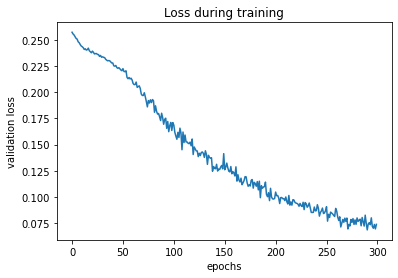

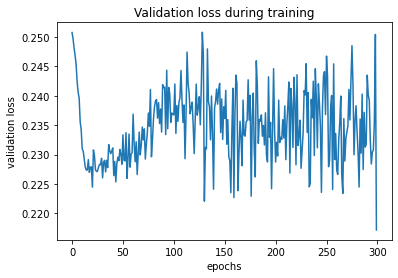

In [12]:
display_helper.show_plot(x = range(len(history['loss'])), y = history['loss'] ,xlabel = "epochs", ylabel = "validation loss", title = "Loss during training")
display_helper.show_plot(x = range(len(history['loss'])), y = history['val_loss'] ,xlabel = "epochs", ylabel = "validation loss", title = "Validation loss during training")

<br>

<a id='3'></a>
## 3. Make predictions on test-set

In [6]:
print(f"The data instance has shape: {x[index].shape}")
x, y = train_sequence.__getitem__(50)

print(np.squeeze(model.predict(x)))
model.compute_loss(x=x, y=y, y_pred=np.squeeze(model.predict(x)))

NameError: name 'x' is not defined

In [ ]:
x[1].shape

In [ ]:
print(model.predict(x[1]))


In [ ]:
# Loop over test_set, analyse each file x amount of time

for testfile in testset: 
    
    
    
    
    test_experiment = epodium_deep_learning.EvokedDataIterator([testfile], path_processed, n_experiments_batch = 8)

    index = 16
    x, y = test_experiment.__getitem__(0)
    epodium.plot_array_as_evoked(x[index])
    
    print(model.predict(x[index]))


    
    break

    # Load 

In [ ]:
len(x)

In [ ]:
### OLD!



#     label_sex = 'male' if y[index][0] else 'female'
#     label_risk = 'risk' if y[index][1] else 'no risk'
#     label_event = 'deviant' if y[index][2] else 'standard'

#     print (f"{int(y[index][0])}: {label_sex}, \
#          {int(y[index][1])}: {label_risk}, \
#          {int(y[index][2])}: {label_event}")